Dataset with preset stocks

In [6]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [7]:
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [8]:
#extract
source = 'yahoo'
start_date = '2017-01-01'
end_date = '2019-01-01'
data = web.DataReader(list(companies_dict.values()), source, start_date, end_date)

In [9]:
#transform
stock_close = np.array(data['Close']).T
stock_open = np.array(data['Open']).T

row, col = stock_close.shape

stock_diff = np.zeros([row, col])

for i in range(0, row):
    stock_diff[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [22]:
#pipeline + model
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, max_iter=1000)

pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(stock_diff)

cluster = pipeline.predict(stock_diff)

df = pd.DataFrame({'cluster': cluster, 'company': companies})

# display df sorted by cluster labels
print(df.sort_values('cluster'))

    cluster                   company
23        0              (Exxon, XOM)
18        0              (Pepsi, PEP)
17        0   (Northrop Grumman, NOC)
6         0                 (Ford, F)
13        0    (Lockheed Martin, LMT)
8         0              (Honda, HMC)
22        0           (Walgreen, WBA)
3         1              (Boeing, BA)
4         1    (Bank of America, BAC)
5         1            (Chevron, CVX)
0         2             (Apple, AAPL)
1         2            (Amazon, AMZN)
10        2             (Intel, INTC)
11        2  (Johnson & Johnson, JNJ)
19        3              (Toyota, TM)
20        3  (Texas Instruments, TXN)
16        4         (Microsoft, MSFT)
14        5          (MasterCard, MA)
15        5          (McDonalds, MCD)
2         6   (American Express, AXP)
9         7                (IBM, IBM)
7         7    (General Electric, GE)
12        8           (Coca Cola, KO)
21        9      (Valero Energy, VLO)


In [26]:
#reduced data
reduced_data = PCA(n_components = 2).fit_transform(normalizer.fit_transform(stock_diff))
kmeans = KMeans(n_clusters=9)
kmeans.fit(reduced_data)
cluster = kmeans.predict(reduced_data)
df = pd.DataFrame({'cluster': cluster, 'companies': companies})
print(df.sort_values('cluster'))

    cluster                 companies
22        0           (Walgreen, WBA)
12        0           (Coca Cola, KO)
4         1    (Bank of America, BAC)
7         1    (General Electric, GE)
9         1                (IBM, IBM)
14        2          (MasterCard, MA)
15        2          (McDonalds, MCD)
2         3   (American Express, AXP)
8         3              (Honda, HMC)
6         4                 (Ford, F)
16        4         (Microsoft, MSFT)
23        5              (Exxon, XOM)
21        5      (Valero Energy, VLO)
18        5              (Pepsi, PEP)
17        5   (Northrop Grumman, NOC)
13        5    (Lockheed Martin, LMT)
0         6             (Apple, AAPL)
1         6            (Amazon, AMZN)
10        6             (Intel, INTC)
11        6  (Johnson & Johnson, JNJ)
19        7              (Toyota, TM)
20        7  (Texas Instruments, TXN)
5         8            (Chevron, CVX)
3         8              (Boeing, BA)


<Figure size 432x288 with 0 Axes>

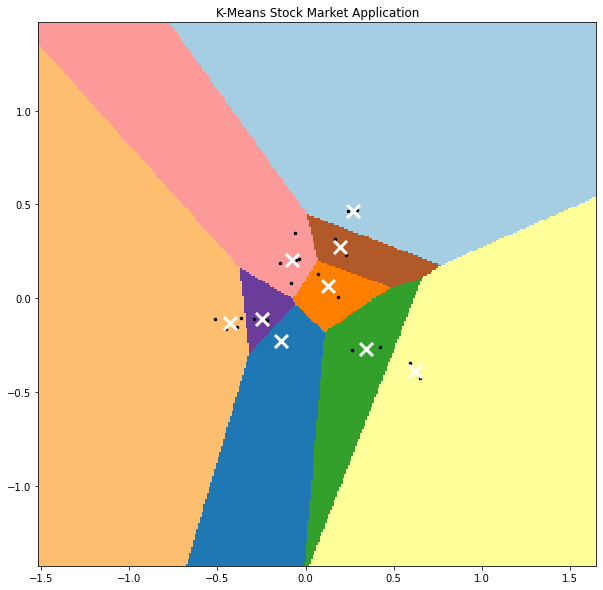

In [17]:
#plot
h = 0.01

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired

plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Stock Market Application')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()